In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.cm as cm
%matplotlib inline

In [47]:
x1 = 0.008
x2 = 1.5
y1_ = 10.2
y2_ = 0.005

# Cost Function

In [5]:
def loss_function3(w1, w2):
    return ( y1_ - w1 * x1 )**2 + (y2_ - w2 * x2) ** 2

In [56]:
def draw_loss(ax, clabel_flag=False, lf=None, lspace=None):
    delta = 0.025
    w1 = np.arange(-50.0, +50.0, delta)
    w2 = np.arange(-50.0, +50.0, delta)
    W1, W2 = np.meshgrid(w1, w2)
    Z = lf(W1, W2)
    if lspace is None:
        ls = np.logspace(1.,3.8,50)
    else:
        ls = lspace
        
    CS = ax.contour(W1, W2, Z, ls)
    
#    plt.clabel(CS, inline=5,inline_spacing=0, fontsize=10)
    if clabel_flag:
        ax.clabel(CS, inline=1,inline_spacing=0, fontsize=10)
    

In [54]:
def draw_cost_function(lf=None, lspace=None):
    fig, ax = plt.subplots(ncols=1, figsize=(8,8))
    draw_loss(ax, clabel_flag=False, lf=lf, lspace=lspace)
    ax.set_title('Cost Function')    

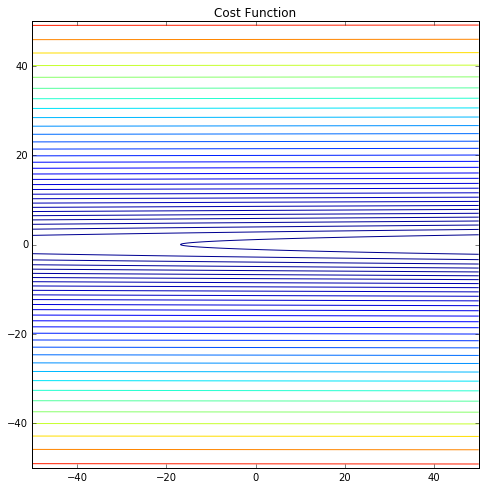

In [50]:
draw_cost_function(loss_function3)

# Reset

In [271]:
sess.close()
tf.reset_default_graph()

# Create Network1

In [13]:
def create_network(lf = None, _w1_init=-25.8, _w2_init=45.9):
    w1_sgd = tf.Variable(tf.constant([_w1_init]))
    w2_sgd = tf.Variable(tf.constant([_w2_init]))
    w1_mmt = tf.Variable(tf.constant([_w1_init]))
    w2_mmt = tf.Variable(tf.constant([_w2_init]))
    z_sgd = lf(w1_sgd,w2_sgd)
    z_mmt = lf(w1_mmt,w2_mmt)
    
    return w1_sgd, w2_sgd, z_sgd, w1_mmt, w2_mmt, z_mmt

In [14]:
w1_sgd, w2_sgd, z_sgd, w1_mmt, w2_mmt, z_mmt = create_network(lf=loss_function3, _w1_init=-25.8, _w2_init=45.9)

In [15]:
opt_sgd = tf.train.GradientDescentOptimizer(0.43).minimize(z_sgd)
opt_mmt = tf.train.MomentumOptimizer(0.43, 0.7).minimize(z_mmt)


In [16]:
sess = tf.InteractiveSession()
tf.initialize_all_variables().run()

In [18]:
trace_sgd = []
trace_mmt = []

In [19]:
def opt_run(w1, w2, z, opt):
    loss, _ = sess.run([z, opt])
    dw1, dw2 = sess.run([w1, w2])
    return dw1, dw2, loss

In [20]:
n_train = 300
for step in range(n_train):
    dw1_sgd, dw2_sgd, loss_sgd = opt_run(w1_sgd, w2_sgd, z_sgd, opt_sgd)
    trace_sgd.append([dw1_sgd, dw2_sgd, loss_sgd])
    
    dw1_mmt, dw2_mmt, loss_mmt = opt_run(w1_mmt, w2_mmt, z_mmt, opt_mmt)
    trace_mmt.append([dw1_mmt, dw2_mmt, loss_mmt])

    print "[sgd]w1:%.2f, w2:%.2f, loss:%.2f [mmt]w1:%.2f, w2:%.2f, loss:%.2f" % (dw1_sgd, dw2_sgd, loss_sgd, dw1_mmt, dw2_mmt, loss_mmt)

[sgd]w1:-25.73, w2:-42.91, loss:4847.93 [mmt]w1:-25.73, w2:-42.91, loss:4847.93
[sgd]w1:-25.66, w2:40.13, loss:4251.79 [mmt]w1:-25.61, w2:-22.04, loss:4251.79
[sgd]w1:-25.59, w2:-37.51, loss:3730.63 [mmt]w1:-25.45, w2:35.22, loss:1201.52
[sgd]w1:-25.51, w2:35.08, loss:3275.02 [mmt]w1:-25.27, w2:7.16, loss:2899.16
[sgd]w1:-25.44, w2:-32.79, loss:2876.71 [mmt]w1:-25.07, w2:-26.33, loss:223.34
[sgd]w1:-25.37, w2:30.67, loss:2528.49 [mmt]w1:-24.86, w2:1.18, loss:1668.59
[sgd]w1:-25.30, w2:-28.67, loss:2224.07 [mmt]w1:-24.64, w2:18.16, loss:111.28
[sgd]w1:-25.23, w2:26.81, loss:1957.94 [mmt]w1:-24.42, w2:-5.09, loss:849.85
[sgd]w1:-25.16, w2:-25.06, loss:1725.28 [mmt]w1:-24.19, w2:-11.51, loss:166.44
[sgd]w1:-25.08, w2:23.44, loss:1521.88 [mmt]w1:-23.96, w2:6.27, loss:406.24
[sgd]w1:-25.01, w2:-21.91, loss:1344.06 [mmt]w1:-23.72, w2:6.59, loss:196.47
[sgd]w1:-24.94, w2:20.49, loss:1188.60 [mmt]w1:-23.49, w2:-5.93, loss:205.52
[sgd]w1:-24.87, w2:-19.15, loss:1052.70 [mmt]w1:-23.25, w2:-3.21,

In [59]:
def draw_loss_and_dot(dots_sgd, dots_mmt, clabel_flag=False, lf=None, lspace=None):
    fig, ax = plt.subplots(ncols=1, figsize=(8,8))
    draw_loss(ax, clabel_flag=clabel_flag, lf=lf, lspace=lspace)
    ax.plot(dots_sgd[:,0], dots_sgd[:,1], 'b', label='sgd')
    ax.plot(dots_mmt[:,0], dots_mmt[:,1], 'r', label='momentum')
    ax.set_xlim(-50,50)
    ax.set_ylim(-50,50)
    ax.set_xlabel('w1')
    ax.set_ylabel('w2')
    ax.legend(loc='upper right', shadow=True)    
#    plt.clabel(CS, inline=1,inline_spacing=0, fontsize=10)
    ax.set_title('Cost Function')

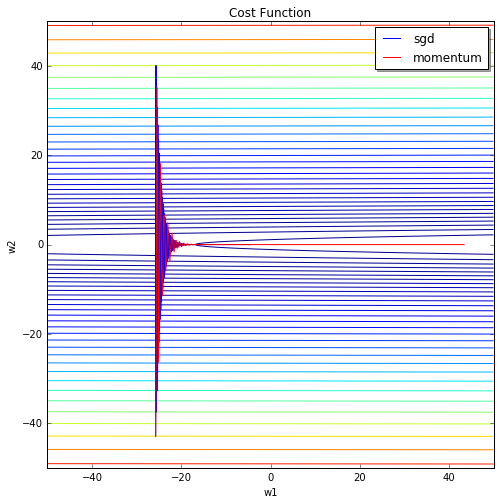

In [22]:
draw_loss_and_dot(np.array(trace_sgd), np.array(trace_mmt), lf=loss_function3)

In [65]:
def draw_loss_and_dot2(dots_sgd, dots_mmt, clabel_flag=False, lf=None, lspace=None):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,8))
    draw_loss(ax1, clabel_flag=clabel_flag, lf=lf, lspace=lspace)
    ax1.plot(dots_sgd[:,0], dots_sgd[:,1], 'b', label='sgd')
    ax1.set_xlim(-50,50)
    ax1.set_ylim(-50,50)
    ax1.set_xlabel('w1')
    ax1.set_ylabel('w2')
    ax1.set_title('Cost Function - SGD')    
    ax1.set(aspect='equal')
    
    draw_loss(ax2, clabel_flag=clabel_flag, lf=lf, lspace=lspace)    
    ax2.plot(dots_mmt[:,0], dots_mmt[:,1], 'r', label='momentum')
    ax2.set_xlim(-50,50)
    ax2.set_ylim(-50,50)
    ax2.set_xlabel('w1')
    ax2.set_ylabel('w2')
    ax2.set_title('Cost Function - momentum')   
    ax2.set(aspect='equal')    
#    ax.legend(loc='upper right', shadow=True)    
#    plt.clabel(CS, inline=1,inline_spacing=0, fontsize=10)


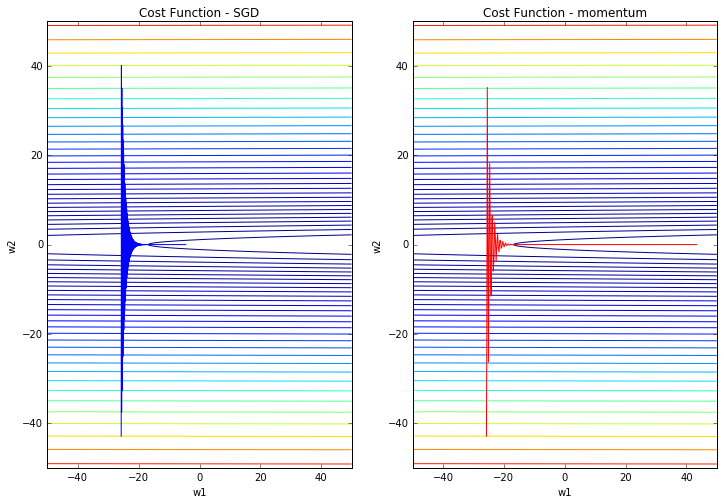

In [24]:
draw_loss_and_dot2(np.array(trace_sgd), np.array(trace_mmt), lf=loss_function3)

In [39]:
from matplotlib import animation, pyplot as plt
from tempfile import NamedTemporaryFile
FRAME_RATE = 2
VIDEO_TAG = """<video controls autoplay>
 <source src="data:{0}">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.m4v') as f:
            anim.save(f.name, fps=FRAME_RATE, extra_args=['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])
            video = open(f.name, "rb").read()
        anim._encoded_video = 'video/mp4;base64,' + video.encode("base64")
    # prevent figure displayed as a PNG below the animation
    plt.close()
    
    return VIDEO_TAG.format(anim._encoded_video)

animation.Animation._repr_html_ = anim_to_html

In [40]:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

In [41]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(8,8))
ax = plt.axes(xlim=(-50, 50), ylim=(-50, 50))
draw_loss(ax, lf=loss_function3)

dots_sgd = np.array(trace_sgd)

n , m = dots_sgd.shape[:2]
dots_sgd = dots_sgd.reshape((n, m))

ax.set_title('Cost Function')

dots1, = ax.plot([], [], 'bo', lw=2)
line1, = ax.plot([], [], 'b-', lw=1, label='sgd')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.legend(loc='upper right', shadow=True)    

# initialization function: plot the background of each frame
def init():
    line1.set_data([], [])
    return line1,

# animation function.  This is called sequentially
def animate(i):
    line1.set_data(dots_sgd[:i,0], dots_sgd[:i,1])
    dots1.set_data(dots_sgd[i,0], dots_sgd[i,1])
    return line1,

# call the animator.  blit=True means only re-draw the parts that have changed.
animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=1, blit=True)


In [30]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(8,8))
ax = plt.axes(xlim=(-50, 50), ylim=(-50, 50))
draw_loss(ax, lf=loss_function3)

dots_mmt = np.array(trace_mmt)

n , m = dots_mmt.shape[:2]
dots_mmt = dots_mmt.reshape((n, m))

ax.set_title('Cost Function')

dots2, = ax.plot([], [], 'ro', lw=2)
line2, = ax.plot([], [], 'r-', lw=1, label='momentum')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.legend(loc='upper right', shadow=True)    

# initialization function: plot the background of each frame
def init():
    line2.set_data([], [])
    return line2,

# animation function.  This is called sequentially
def animate(i):
    line2.set_data(dots_mmt[:i,0], dots_mmt[:i,1])
    dots2.set_data(dots_mmt[i,0], dots_mmt[i,1])
    return line2,

# call the animator.  blit=True means only re-draw the parts that have changed.
animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=1, blit=True)

In [32]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(8,8))
ax = plt.axes(xlim=(-50, 50), ylim=(-50, 50))
draw_loss(ax, lf=loss_function3)

dots_sgd = np.array(trace_sgd)
dots_mmt = np.array(trace_mmt)

n , m = dots_sgd.shape[:2]
dots_sgd = dots_sgd.reshape((n, m))
n , m = dots_mmt.shape[:2]
dots_mmt = dots_mmt.reshape((n, m))

ax.set_title('Cost Function')

dots1, = ax.plot([], [], 'bo', lw=2)
dots2, = ax.plot([], [], 'ro', lw=2)
line1, = ax.plot([], [], 'b-', lw=1, label='sgd')
line2, = ax.plot([], [], 'r-', lw=1, label='momentum')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.legend(loc='upper right', shadow=True)    

# initialization function: plot the background of each frame
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2,

# animation function.  This is called sequentially
def animate(i):
    line1.set_data(dots_sgd[:i,0], dots_sgd[:i,1])
    dots1.set_data(dots_sgd[i,0], dots_sgd[i,1])
    line2.set_data(dots_mmt[:i,0], dots_mmt[:i,1])
    dots2.set_data(dots_mmt[i,0], dots_mmt[i,1])
    return line1, line2,

# call the animator.  blit=True means only re-draw the parts that have changed.
animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=1, blit=True)

In [34]:
# First set up the figure, the axis, and the plot element we want to animate
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
draw_loss(ax1, lf=loss_function3)
draw_loss(ax2, lf=loss_function3)

dots_sgd = np.array(trace_sgd)
dots_mmt = np.array(trace_mmt)

n , m = dots_sgd.shape[:2]
dots_sgd = dots_sgd.reshape((n, m))
n , m = dots_mmt.shape[:2]
dots_mmt = dots_mmt.reshape((n, m))

ax1.set_title('Cost Function - SGD')
ax2.set_title('Cost Function - momentum')

dots1, = ax1.plot([], [], 'bo', lw=2)
dots2, = ax2.plot([], [], 'ro', lw=2)
line1, = ax1.plot([], [], 'b-', lw=1, label='sgd')
line2, = ax2.plot([], [], 'r-', lw=1, label='momentum')
ax1.set_xlabel('w1')
ax1.set_ylabel('w2')
ax2.set_xlabel('w1')
ax2.set_ylabel('w2')
ax1.set_xlim(-50,50)
ax1.set_ylim(-50,50)
ax2.set_xlim(-50,50)
ax2.set_ylim(-50,50)
ax1.set(aspect='equal')
ax2.set(aspect='equal')
#ax.legend(loc='upper right', shadow=True)    

# initialization function: plot the background of each frame
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2,

# animation function.  This is called sequentially
def animate(i):
    line1.set_data(dots_sgd[:i,0], dots_sgd[:i,1])
    dots1.set_data(dots_sgd[i,0], dots_sgd[i,1])
    line2.set_data(dots_mmt[:i,0], dots_mmt[:i,1])
    dots2.set_data(dots_mmt[i,0], dots_mmt[i,1])
    return line1, line2,

# call the animator.  blit=True means only re-draw the parts that have changed.
animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=1, blit=True)

# Create Network2

In [60]:
x1 = 0.8
x2 = 1.5
y1_ = 1.2
y2_ = 0.5
lspace = lspace=np.logspace(1.,3.8,20)

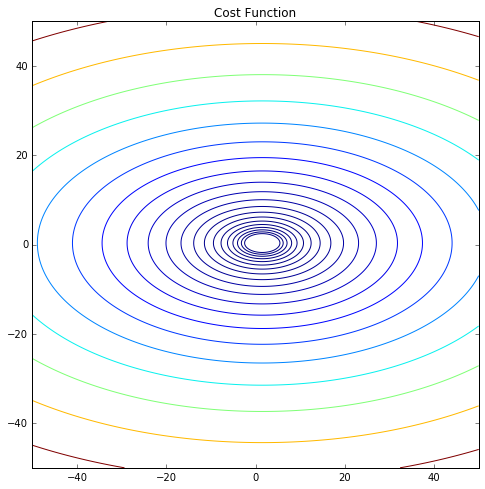

In [57]:
draw_cost_function(loss_function3, lspace=lspace)

In [71]:
sess.close()
tf.reset_default_graph()

In [72]:
w1_sgd, w2_sgd, z_sgd, w1_mmt, w2_mmt, z_mmt = create_network(lf=loss_function3, _w1_init=-25.8, _w2_init=45.9)
opt_sgd = tf.train.GradientDescentOptimizer(0.05).minimize(z_sgd)
opt_mmt = tf.train.MomentumOptimizer(0.05, 0.7).minimize(z_mmt)

sess = tf.InteractiveSession()
tf.initialize_all_variables().run()

trace_sgd = []
trace_mmt = []

n_train = 100
for step in range(n_train):
    dw1_sgd, dw2_sgd, loss_sgd = opt_run(w1_sgd, w2_sgd, z_sgd, opt_sgd)
    trace_sgd.append([dw1_sgd, dw2_sgd, loss_sgd])
    
    dw1_mmt, dw2_mmt, loss_mmt = opt_run(w1_mmt, w2_mmt, z_mmt, opt_mmt)
    trace_mmt.append([dw1_mmt, dw2_mmt, loss_mmt])

    print "step: %d [sgd]w1:%.2f, w2:%.2f, loss:%.2f [mmt]w1:%.2f, w2:%.2f, loss:%.2f" % (step, dw1_sgd, dw2_sgd, loss_sgd, dw1_mmt, dw2_mmt, loss_mmt)
    

step: 0 [sgd]w1:-24.05, w2:35.65, loss:5148.71 [mmt]w1:-24.05, w2:35.65, loss:5148.71
step: 1 [sgd]w1:-22.42, w2:27.70, loss:3223.84 [mmt]w1:-21.19, w2:20.53, loss:3223.84
step: 2 [sgd]w1:-20.89, w2:21.54, loss:2051.43 [mmt]w1:-17.74, w2:5.40, loss:1246.96
step: 3 [sgd]w1:-19.45, w2:16.77, loss:1332.99 [mmt]w1:-14.09, w2:-6.33, loss:294.61
step: 4 [sgd]w1:-18.11, w2:13.07, loss:888.99 [mmt]w1:-10.54, w2:-13.04, loss:255.59
step: 5 [sgd]w1:-16.86, w2:10.21, loss:611.36 [mmt]w1:-7.28, w2:-14.73, loss:495.41
step: 6 [sgd]w1:-15.68, w2:7.99, loss:435.01 [mmt]w1:-4.44, w2:-12.52, loss:559.99
step: 7 [sgd]w1:-14.58, w2:6.26, loss:320.69 [mmt]w1:-2.07, w2:-8.08, loss:394.49
step: 8 [sgd]w1:-13.55, w2:4.93, loss:244.67 [mmt]w1:-0.18, w2:-3.08, loss:167.60
step: 9 [sgd]w1:-12.59, w2:3.90, loss:192.56 [mmt]w1:1.24, w2:1.19, loss:28.09
step: 10 [sgd]w1:-11.69, w2:3.09, loss:155.61 [mmt]w1:2.26, w2:3.98, loss:1.68
step: 11 [sgd]w1:-10.84, w2:2.47, loss:128.46 [mmt]w1:2.92, w2:5.12, loss:30.34
step

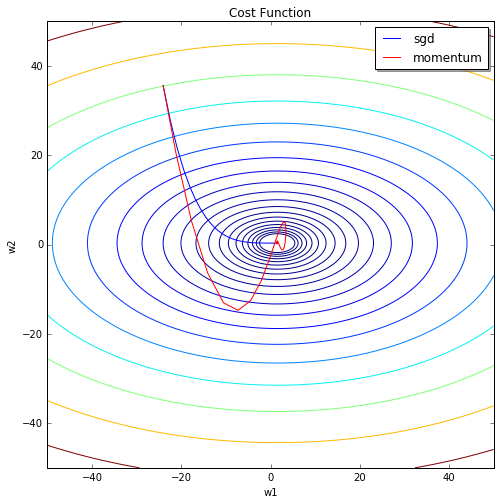

In [73]:
draw_loss_and_dot(np.array(trace_sgd), np.array(trace_mmt), lf=loss_function3, lspace=lspace)

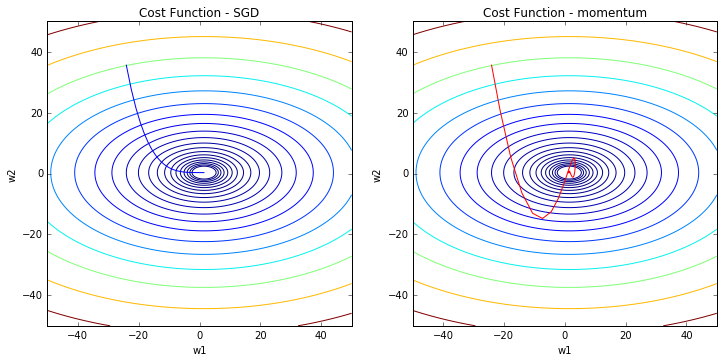

In [74]:
draw_loss_and_dot2(np.array(trace_sgd), np.array(trace_mmt), lf=loss_function3, lspace=lspace)

In [75]:
FRAME_RATE = 20

In [76]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(8,8))
ax = plt.axes(xlim=(-50, 50), ylim=(-50, 50))
draw_loss(ax, lf=loss_function3, lspace=lspace)

dots_sgd = np.array(trace_sgd)
dots_mmt = np.array(trace_mmt)

n , m = dots_sgd.shape[:2]
dots_sgd = dots_sgd.reshape((n, m))
n , m = dots_mmt.shape[:2]
dots_mmt = dots_mmt.reshape((n, m))

ax.set_title('Cost Function')

dots1, = ax.plot([], [], 'bo', lw=2)
dots2, = ax.plot([], [], 'ro', lw=2)
line1, = ax.plot([], [], 'b-', lw=1, label='sgd')
line2, = ax.plot([], [], 'r-', lw=1, label='momentum')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.legend(loc='upper right', shadow=True)    

# initialization function: plot the background of each frame
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2,

# animation function.  This is called sequentially
def animate(i):
    line1.set_data(dots_sgd[:i,0], dots_sgd[:i,1])
    dots1.set_data(dots_sgd[i,0], dots_sgd[i,1])
    line2.set_data(dots_mmt[:i,0], dots_mmt[:i,1])
    dots2.set_data(dots_mmt[i,0], dots_mmt[i,1])
    return line1, line2,

# call the animator.  blit=True means only re-draw the parts that have changed.
animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(trace_sgd), interval=20, blit=True)

In [78]:
# First set up the figure, the axis, and the plot element we want to animate
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
draw_loss(ax1, lf=loss_function3, lspace=lspace)
draw_loss(ax2, lf=loss_function3, lspace=lspace)

dots_sgd = np.array(trace_sgd)
dots_mmt = np.array(trace_mmt)

n , m = dots_sgd.shape[:2]
dots_sgd = dots_sgd.reshape((n, m))
n , m = dots_mmt.shape[:2]
dots_mmt = dots_mmt.reshape((n, m))

ax1.set_title('Cost Function - SGD')
ax2.set_title('Cost Function - momentum')

dots1, = ax1.plot([], [], 'bo', lw=2)
dots2, = ax2.plot([], [], 'ro', lw=2)
line1, = ax1.plot([], [], 'b-', lw=1, label='sgd')
line2, = ax2.plot([], [], 'r-', lw=1, label='momentum')
ax1.set_xlabel('w1')
ax1.set_ylabel('w2')
ax2.set_xlabel('w1')
ax2.set_ylabel('w2')
ax1.set_xlim(-50,50)
ax1.set_ylim(-50,50)
ax2.set_xlim(-50,50)
ax2.set_ylim(-50,50)
ax1.set(aspect='equal')
ax2.set(aspect='equal')
#ax.legend(loc='upper right', shadow=True)    

# initialization function: plot the background of each frame
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2,

# animation function.  This is called sequentially
def animate(i):
    line1.set_data(dots_sgd[:i,0], dots_sgd[:i,1])
    dots1.set_data(dots_sgd[i,0], dots_sgd[i,1])
    line2.set_data(dots_mmt[:i,0], dots_mmt[:i,1])
    dots2.set_data(dots_mmt[i,0], dots_mmt[i,1])
    return line1, line2,

# call the animator.  blit=True means only re-draw the parts that have changed.
animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(trace_sgd), interval=20, blit=True)